In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

In [27]:
X=Variable(torch.Tensor([[1.0],[2.0],[3.0],[4.0]]))
y=Variable(torch.Tensor([[0.],[0.],[1.],[1.]]))

In [33]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear=nn.Linear(in_features=1,out_features=1)
        #in_features, out_features are the dimensions of the weight matrix
        
    def forward(self,x):
        yhat=F.sigmoid(self.linear(x))
        return yhat

In [34]:
model=Model()

In [35]:
criterion=nn.BCELoss(size_average=True)
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

/home/ricky/miniconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [36]:
loss_ls=[]

#Training loop
for epoch in range(500):
    #Compute yhat, given X
    yhat=model(X)
    
    #Compute loss
    loss=criterion(yhat, y)
    loss_ls.append(loss.data.item())
    
    #Zero gradients, perform backprop and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/home/ricky/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


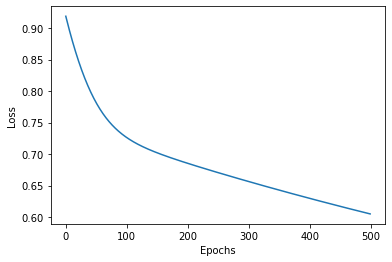

In [37]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0,500),loss_ls)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Learn activation functions:
    - ReLU
    - ReLU6
    - ELU
    - SELU
    - PReLU
    - LeakyReLU
    - Threshold
    - Hardtanh
    - tanh